In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df1 = pd.read_csv('比亚迪.csv')
df1.head ()
df2 = pd.read_csv('长城汽车.csv')
df2.head ()

,Date,Symbol,Open,High,Low,Close,Volume
0,2018/1/1,601633,39.553,39.553,39.553,39.553,0
1,2018/1/2,601633,39.931,42.410,39.656,42.169,26588018
2,2018/1/3,601633,41.894,42.685,41.722,42.479,19954871
3,2018/1/4,601633,42.341,42.617,41.790,42.444,14156115
4,2018/1/5,601633,42.444,42.857,41.790,42.720,12596454


In [4]:
BYD = df1[['Date','Symbol','Open','High','Low','Close','Volume']]
BYD['Date'] = BYD['Date'].apply(pd.to_datetime)
BYD.set_index('Date',inplace = True)
BYD.head ()
GWM = df2[['Date','Symbol','Open','High','Low','Close','Volume']]
GWM ['Date'] = GWM ['Date'].apply(pd.to_datetime)
GWM.set_index('Date',inplace = True)
GWM.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2018-01-01,601633,39.553,39.553,39.553,39.553,0
2018-01-02,601633,39.931,42.410,39.656,42.169,26588018
2018-01-03,601633,41.894,42.685,41.722,42.479,19954871
2018-01-04,601633,42.341,42.617,41.790,42.444,14156115
2018-01-05,601633,42.444,42.857,41.790,42.720,12596454


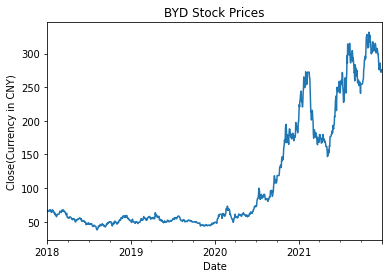

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1 = BYD ['Close'].plot (title = 'BYD Stock Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close(Currency in CNY)')
plt.savefig ('BYD_Stock Prices.png',dpi=400,bbox_inches = 'tight')

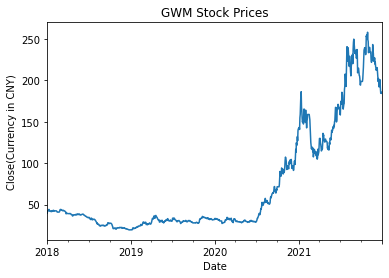

In [6]:
fig = plt.figure()
ax2 = fig.add_subplot(1,1,1)
ax2 = GWM ['Close'].plot (title = 'GWM Stock Prices')
ax2.set_xlabel('Date')
ax2.set_ylabel('Close(Currency in CNY)')
plt.savefig ('GWM_Stock Prices.png',dpi=400,bbox_inches = 'tight')

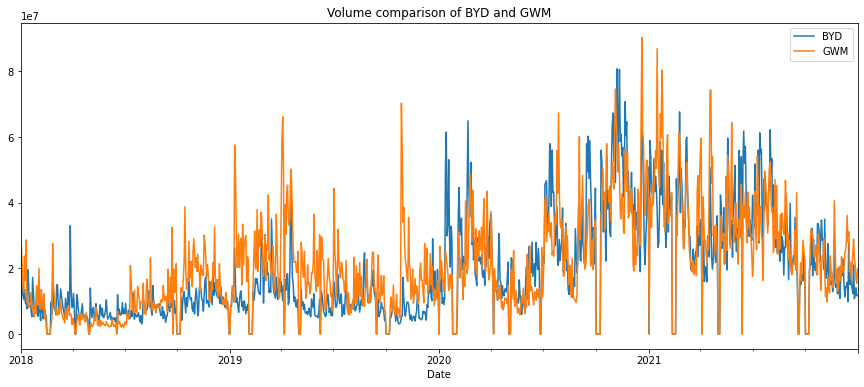

In [7]:
fig = plt.figure(figsize =(15,6))
BYD ['Volume'].plot (label = 'BYD',title ='Volume comparison of BYD and GWM')
GWM['Volume'].plot(label = 'GWM')
plt.legend(loc = 'best')
plt.savefig ('BYDvsGWM_Volume.png',dpi =400,bbox_inches = 'tight')

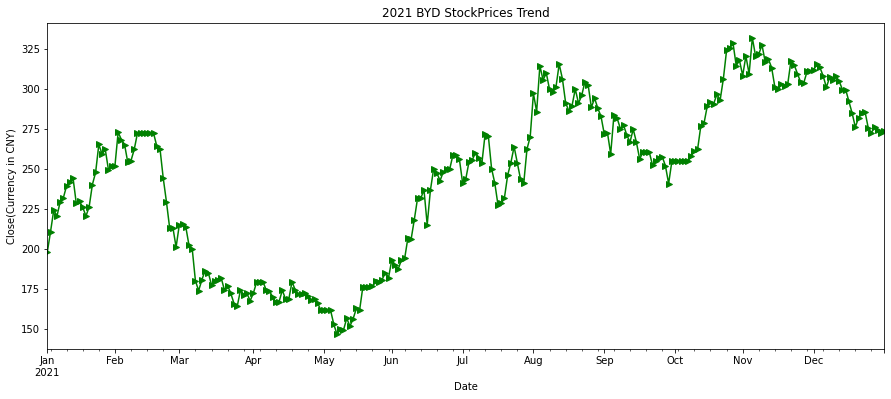

In [9]:
fig = plt.figure()
ax1= BYD.loc ['2021-1-1':'2021-12-31','Close'].plot (marker = '>',color = 'g',figsize =(15,6))
ax1.set_title ('2021 BYD StockPrices Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close(Currency in CNY)')
plt.savefig('BYD Stock Prices.png',dpi = 400,bbox_inches = 'tight')

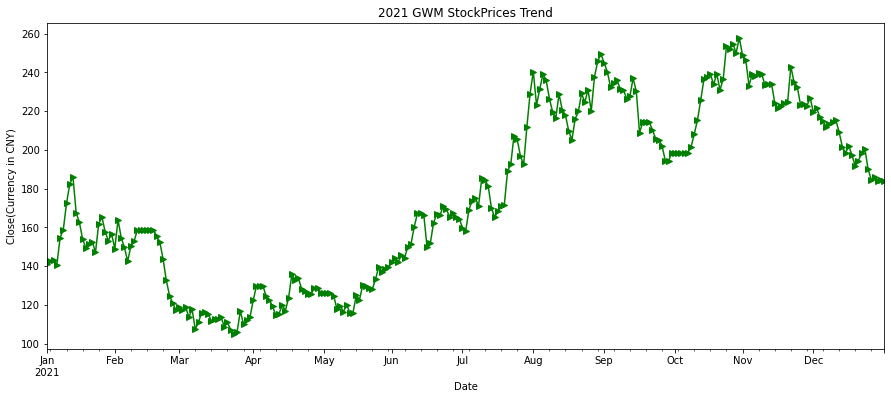

In [10]:
fig = plt.figure()
ax2= GWM.loc ['2021-1-1':'2021-12-31','Close'].plot (marker = '>',color = 'g',figsize =(15,6))
ax2.set_title ('2021 GWM StockPrices Trend')
ax2.set_xlabel('Date')
ax2.set_ylabel('Close(Currency in CNY)')
plt.savefig('GWM Stock Prices.png',dpi = 400,bbox_inches = 'tight')

D:\Ananconda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


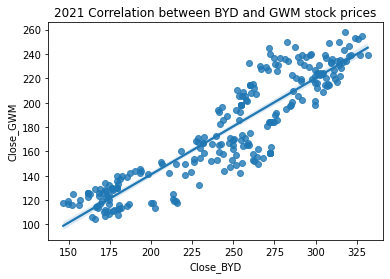

In [11]:
group = pd.merge (BYD,GWM,on = 'Date',suffixes =('_BYD','_GWM'))
group_2021 = group.loc['2021-1-1':'2021-12-31']
fig = plt.figure()
sns.regplot ('Close_BYD','Close_GWM',data = group_2021)
plt.title ('2021 Correlation between BYD and GWM stock prices')
plt.savefig('BYD&GWM_Correlation.png',dpi = 400,bbox_inches = 'tight')